# Pyramidal Images
Many CV operation can be applied in a top-down strategy from a low detailed image to the highest detail. This operation is performed by computing an Image Pyramid from the top level WxH down to a limit MxN reaching by division by 2. 

The pyramid can be represented in 3D as a list of images, but it is easier to express them in a single compact image, that can then be accessed using slicing and strides.

The pyramid is built by taking each level in turn, apply the Gaussian smoothing and downsampling

![title](img/gaussianpyr.png)

Reconstruction is the reverse operation: takes the image, upsamples by 2 with zero values and applies smoothing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
from IPython.display import display
imshowg = lambda x: plt.imshow(x,cmap=plt.get_cmap('gray'))
conv2D = lambda x,k: cv2.filter2D(x, -1, k)

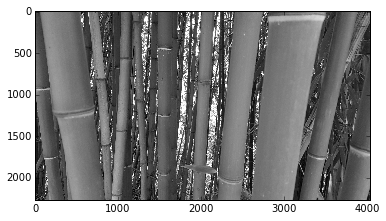

In [2]:
img_in  = cv2.imread('example.jpg',cv2.IMREAD_GRAYSCALE)
imshowg(img_in)

In [3]:
dst = np.empty((int(img_in.shape[0]/2+1),int(img_in.shape[1]/2+1)),img_in.dtype)

((1134, 2016), dtype('uint8')) ((2268, 4032), dtype('uint8'))


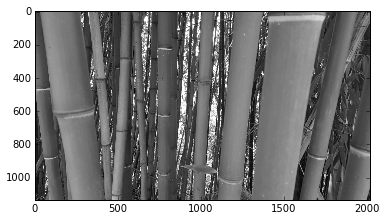

In [4]:
#cv2.pyrDown(img_in,dst)+


dst = cv2.pyrDown(img_in)
print(dst.shape,dst.dtype),(img_in.shape,img_in.dtype)
imshowg(dst)

[(0, 2268, 0, 4032), (0, 1134, 4032, 6048), (1134, 1701, 4032, 5040), (1701, 1985, 4032, 4536), (1985, 2127, 4032, 4284), (2127, 2198, 4032, 4158), (2198, 2234, 4032, 4095), (2234, 2252, 4032, 4064), (2252, 2261, 4032, 4048), (2261, 2266, 4032, 4040), (2266, 2269, 4032, 4036)]


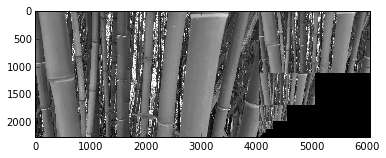

In [5]:
import pyrall
out,levels = pyrall.pyrall(img_in,4)
print (levels)
imshowg(out)